In [1]:
import numpy as np
from scipy.spatial import distance_matrix
from gurobipy import *
from scipy.spatial import ConvexHull
from shapely.geometry import Polygon, Point
from numpy import random

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
def mclp(points,K,radius,M):
    print('----- Configurations -----')
    print('  Number of points %g' % points.shape[0])
    print('  K %g' % K)
    print('  Radius %g' % radius)
    import time
    start = time.time()
    sites = M
    #J -> sites의 개수
    J = sites.shape[0]
    #I -> points의 개수
    I = points.shape[0]
    #D -> sites와 points의 거리 모두 구하기
    D = distance_matrix(points,sites)
    mask1 = D<=radius
    D[mask1]=1
    D[~mask1]=0
    # Build model
    m = Model()
    # Add variables
    x = {}
    y = {}
    # 범위: 0 or 1
    for i in range(I):
      y[i] = m.addVar(vtype=GRB.BINARY, name="y%d" % i)
    for j in range(J):
      x[j] = m.addVar(vtype=GRB.BINARY, name="x%d" % j)

    m.update()
    # Add constraints -> sites가 K개가 되도록
    m.addConstr(quicksum(x[j] for j in range(J)) == K)

    
    for i in range(I):
        m.addConstr(quicksum(x[j] for j in np.where(D[i]==1)[0]) >= y[i])

    m.setObjective(quicksum(y[i]for i in range(I)),GRB.MAXIMIZE)
    m.setParam('OutputFlag', 0)
    m.optimize()
    end = time.time()
    print('----- Output -----')
    print('  Running time : %s seconds' % float(end-start))
    print('  Optimal coverage points: %g' % m.objVal)
    cover.append(m.objVal)
    solution = []
    if m.status == GRB.Status.OPTIMAL:
        for v in m.getVars():
            if v.x==1 and v.varName[0]=="x":
               solution.append(int(v.varName[1:]))
    opt_sites = sites[solution]
    return opt_sites,m.objVal


def plot_result(points,opt_sites,radius):
    from matplotlib import pyplot as plt



    ax = gwangjin_area.plot(figsize=(8,8), alpha=0.8, facecolor='darkgreen')
    
    plt.scatter(opt_sites[:,0],opt_sites[:,1],c='r',marker='+')
    plt.scatter(points[:,0],points[:,1],c='b')
    for site in opt_sites:
        circle = plt.Circle(site, radius, color='r',fill=False,lw=2)
        ax.add_artist(circle)
    ax.axis('equal')
#     ax.tick_params(axis='both',left=False, top=False, right=False,
#                        bottom=False, labelleft=False, labeltop=False,
#                        labelright=False, labelbottom=False)

In [3]:
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np

In [5]:
bs_GJ = pd.read_csv('bsGJ.csv')
grid = pd.read_csv('grid_result.csv')
bs_table = pd.read_csv('bus_dust_top50.csv')

In [6]:
gwangjin_area = gpd.GeoDataFrame.from_file('./LSMD_CONT_LDREG_서울_광진구/LSMD_CONT_LDREG_11215.shp', encoding='cp949')

In [7]:
gwangjin_area.set_crs(epsg=5186, inplace=True)
gwangjin_area = gwangjin_area.to_crs(epsg=5179)
gwangjin_area = gwangjin_area.to_crs({'init':'epsg:5179'})

In [9]:
grid

,Unnamed: 0,x_index,y_index,격자 당 경로당 수,행정동,격자 당 어린이 보육시설 수,유아비율(%),노인비율(%),kmeans_label,중심점,geometry,x,y
0,0,0,22,0,자양4동,0,2.839451,20.913757,0,POINT (960888.0000000005 1948207.9999999998),POLYGON ((960788.0000000006 1948307.9999999998...,960888.0,1948208.0
1,1,0,23,0,자양4동,0,2.839451,20.913757,0,POINT (960887.9999999998 1948008.0000000002),"POLYGON ((960788.0000000003 1948108, 960988.00...",960888.0,1948008.0
2,2,0,24,0,자양4동,0,2.839451,20.913757,0,POINT (960887.9999999995 1947808),"POLYGON ((960787.9999999991 1947908.000000001,...",960888.0,1947808.0
3,3,0,25,0,자양4동,0,2.839451,20.913757,0,POINT (960887.9999999999 1947607.9999999998),POLYGON ((960788.0000000001 1947707.9999999998...,960888.0,1947608.0
4,4,1,20,0,자양4동,0,2.839451,20.913757,0,POINT (961087.9999999992 1948608.0000000002),"POLYGON ((960987.9999999992 1948708, 961187.99...",961088.0,1948608.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,478,25,8,0,광장동,0,5.025170,11.665886,3,POINT (965888.0000000001 1951007.9999999998),"POLYGON ((965788.000000001 1951108, 965987.999...",965888.0,1951008.0
479,479,25,9,0,광장동,0,5.025170,11.665886,3,POINT (965888.0000000003 1950807.9999999998),POLYGON ((965787.9999999993 1950907.9999999995...,965888.0,1950808.0
480,480,25,10,0,광장동,0,5.025170,11.665886,3,POINT (965888.0000000001 1950608),"POLYGON ((965788.0000000003 1950707.999999999,...",965888.0,1950608.0
481,481,25,11,0,광장동,0,5.025170,11.665886,3,POINT (965887.9999999997 1950408.0000000002),"POLYGON ((965787.9999999995 1950508, 965987.99...",965888.0,1950408.0


In [10]:
bs_GJ

,Unnamed: 0,정류장_ID,정류장_명칭,정류장_유형,정류장_번호,위도,경도,sgg_oid,jibun,pnu,ADM_DR_CD,ADM_DR_NM,geometry,x,y
0,0,274000018,잠실대교북단(경유),일반차로,78449,127.088565,37.528817,96951,753-3도,1121510500107530003,1105065,자양2동,POINT (963647.1288243234 1947802.8740342655),963647.128824,1.947803e+06
1,1,277102301,잠실대교북단(경유),일반차로,78353,127.090492,37.529313,96289,701제,1121510500107010000,1105065,자양2동,POINT (963817.6317456564 1947857.1591678106),963817.631746,1.947857e+06
2,2,274000019,잠실대교북단(경유),일반차로,78450,127.090479,37.529354,96289,701제,1121510500107010000,1105065,자양2동,POINT (963816.5029218596 1947861.7128701974),963816.502922,1.947862e+06
3,3,104900116,행운슈퍼앞,마을버스,5572,127.087010,37.532950,94599,682-15대,1121510500106820015,1105065,자양2동,POINT (963511.7476431297 1948262.0076330916),963511.747643,1.948262e+06
4,4,104900114,성자초등학교앞,마을버스,5562,127.082256,37.531300,95777,652-31대,1121510500106520031,1105065,자양2동,POINT (963090.9099659453 1948080.805095238),963090.909966,1.948081e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,333,104000127,영동대교북단,일반차로,5220,127.061162,37.536568,98481,235-3전,1121510500102350003,1105067,자양4동,POINT (961229.9019587532 1948673.7459698054),961229.901959,1.948674e+06
334,334,104000125,건대로데오거리입구,일반차로,5218,127.069926,37.538919,247655,2-65 도,1121510500100020065,1105067,자양4동,POINT (962005.373336729 1948930.9985563012),962005.373337,1.948931e+06
335,335,104000124,건대입구역6번출구,일반차로,5217,127.067279,37.540827,97155,8-24대,1121510500100080024,1105067,자양4동,POINT (961772.4987052646 1949143.7529470434),961772.498705,1.949144e+06
336,336,104000123,노룬산시장,일반차로,5216,127.062691,37.539503,97503,250-10대,1121510500102500010,1105067,자양4동,POINT (961366.4997665873 1948998.7379146784),961366.499767,1.948999e+06


In [11]:
bs_GJ = bs_GJ.iloc[:, [1,2,11,13,14]]

In [12]:
grid = grid.iloc[:,[1,2,4,8,11,12]]

In [13]:
bs_table = bs_table.iloc[:30,1:]

In [14]:
bs_GJ

,정류장_ID,정류장_명칭,ADM_DR_NM,x,y
0,274000018,잠실대교북단(경유),자양2동,963647.128824,1.947803e+06
1,277102301,잠실대교북단(경유),자양2동,963817.631746,1.947857e+06
2,274000019,잠실대교북단(경유),자양2동,963816.502922,1.947862e+06
3,104900116,행운슈퍼앞,자양2동,963511.747643,1.948262e+06
4,104900114,성자초등학교앞,자양2동,963090.909966,1.948081e+06
...,...,...,...,...,...
333,104000127,영동대교북단,자양4동,961229.901959,1.948674e+06
334,104000125,건대로데오거리입구,자양4동,962005.373337,1.948931e+06
335,104000124,건대입구역6번출구,자양4동,961772.498705,1.949144e+06
336,104000123,노룬산시장,자양4동,961366.499767,1.948999e+06


In [15]:
grid

,x_index,y_index,행정동,kmeans_label,x,y
0,0,22,자양4동,0,960888.0,1948208.0
1,0,23,자양4동,0,960888.0,1948008.0
2,0,24,자양4동,0,960888.0,1947808.0
3,0,25,자양4동,0,960888.0,1947608.0
4,1,20,자양4동,0,961088.0,1948608.0
...,...,...,...,...,...,...
478,25,8,광장동,3,965888.0,1951008.0
479,25,9,광장동,3,965888.0,1950808.0
480,25,10,광장동,3,965888.0,1950608.0
481,25,11,광장동,3,965888.0,1950408.0


In [16]:
bs_table

,표준버스정류장ID,시간합,역명,행정동
0,104000055,4.543287e+06,광진구청,구의1동
1,104000139,4.099491e+06,건대입구역사거리.건대병원,화양동
2,104000111,4.021563e+06,광진문화예술회관,자양3동
3,104000052,3.663630e+06,광진경찰서,구의1동
4,104000007,3.661800e+06,어린이대공원후문아차산역,능동
5,104000006,3.095187e+06,어린이대공원후문아차산역,구의2동
6,104000002,2.981546e+06,군자교입구,군자동
7,104000003,2.947707e+06,군자역.용마초등학교,중곡2동
8,104000125,2.896831e+06,건대로데오거리입구,자양4동
9,104000082,2.891974e+06,광진구청,자양1동


In [17]:
bs_top50 = bs_GJ[bs_GJ['정류장_ID'].isin(bs_table['표준버스정류장ID'])]
# bs_top50 = bs_top50.merge(bs_top50, bs_table.loc[:,['표준버스정류장ID', '시간합']])

In [18]:
bs_top50

,정류장_ID,정류장_명칭,ADM_DR_NM,x,y
8,104900019,구의역4번출구,자양2동,963321.573272,1.948674e+06
12,104000101,자양동잠실대교북단,자양2동,963408.942384,1.948170e+06
13,104000100,자양아파트앞,자양2동,963304.790763,1.948155e+06
14,104000098,국민은행자양지점앞,자양2동,962956.991529,1.948107e+06
15,104000097,자양미소약국.자양골목시장,자양2동,962615.823633,1.948238e+06
72,104900129,강변역.테크노마트앞,구의3동,964184.105229,1.948628e+06
75,104000279,테크노마트앞.강변역,구의3동,964148.337232,1.948672e+06
85,104900097,강변역A,구의3동,964098.306292,1.948585e+06
102,104000003,군자역.용마초등학교,중곡2동,963122.300367,1.950832e+06
108,101000252,신성시장앞,중곡2동,963582.931734,1.951076e+06


In [19]:
grid_c1 = grid[grid['kmeans_label'] == 1]

In [20]:
grid_c2 = grid[grid['kmeans_label'] == 2]

In [21]:
grid_c12 = pd.concat([grid_c1, grid_c2], axis=0)

In [22]:
grid_c12

,x_index,y_index,행정동,kmeans_label,x,y
83,6,20,자양3동,1,962088.0,1948608.0
85,6,22,자양3동,1,962088.0,1948208.0
94,7,22,자양3동,1,962288.0,1948208.0
160,11,23,자양2동,1,963088.0,1948008.0
168,12,24,자양2동,1,963288.0,1947808.0
...,...,...,...,...,...,...
357,16,11,구의2동,2,964088.0,1950408.0
382,15,16,구의3동,2,963888.0,1949408.0
416,18,17,광장동,2,964488.0,1949208.0
430,20,14,광장동,2,964888.0,1949808.0


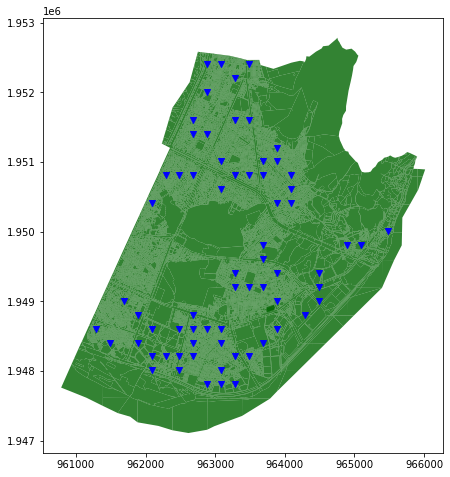

In [23]:
ax = gwangjin_area.plot(figsize=(8,8), alpha=0.8, facecolor='darkgreen')
    
plt.scatter(grid_c12.loc[:,['x']],grid_c12.loc[:,['y']],c='b',marker='v')
plt.show()

In [24]:
# lat_list = []
# log_list = []
# kids_GJ = kids_GJ.copy()
# for i in range(kids_GJ.shape[0]):
#     split_list = kids_GJ.iloc[i,1].split(' ')
#     lat = float(split_list[1][1:])
#     log = float(split_list[2][:-1])
#     lat_list.append(lat)
#     log_list.append(log)

In [25]:
# kids_GJ['위도'] = lat_list
# kids_GJ['경도'] = log_list

In [26]:
# kids_GJ

In [27]:
# bs_GJ

In [28]:
points = grid_c12.loc[:,['x', 'y']].to_numpy()
M = bs_top50.loc[:,['x', 'y']].to_numpy()

----- Configurations -----
  Number of points 68
  K 7
  Radius 500
Restricted license - for non-production use only - expires 2024-10-28
----- Output -----
  Running time : 0.01894831657409668 seconds
  Optimal coverage points: 39


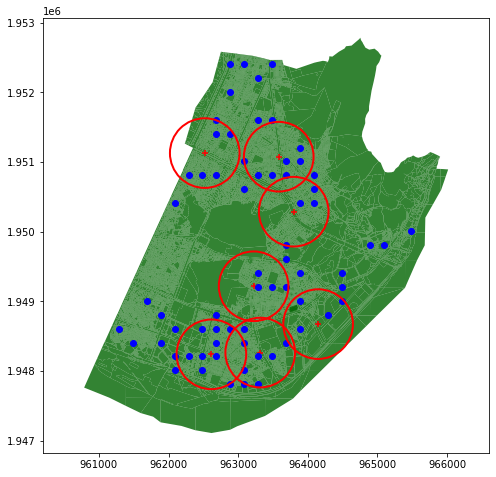

In [29]:
k_list = []
cover=[]
# Number of sites to select
K = 7

# Service radius of each site
radius = 500

# Run mclp opt_sites is the location of optimal sites and f is the points covered
opt_sites,f = mclp(points,K,radius,M)

# Plot the result
plot_result(points,opt_sites,radius)

In [30]:
bs_top50[bs_top50['x'].isin(opt_sites[:,0])]

,정류장_ID,정류장_명칭,ADM_DR_NM,x,y
15,104000097,자양미소약국.자양골목시장,자양2동,962615.823633,1.948238e+06
75,104000279,테크노마트앞.강변역,구의3동,964148.337232,1.948672e+06
108,101000252,신성시장앞,중곡2동,963582.931734,1.951076e+06
183,104000095,자양동잠실대교북단,자양1동,963317.022680,1.948263e+06
199,104000052,광진경찰서,구의1동,963222.459009,1.949216e+06
209,104000006,어린이대공원후문아차산역,구의2동,963797.913379,1.950286e+06
250,104000001,군자교입구,중곡1동,962520.632170,1.951128e+06


In [31]:
bs_top50.rename({'정류장ID': '표준버스정류장ID'})
bs_top50
# result = pd.merge(bs_top50, bs_table.loc[:,['표준버스정류장ID', '시간합']])

,정류장_ID,정류장_명칭,ADM_DR_NM,x,y
8,104900019,구의역4번출구,자양2동,963321.573272,1.948674e+06
12,104000101,자양동잠실대교북단,자양2동,963408.942384,1.948170e+06
13,104000100,자양아파트앞,자양2동,963304.790763,1.948155e+06
14,104000098,국민은행자양지점앞,자양2동,962956.991529,1.948107e+06
15,104000097,자양미소약국.자양골목시장,자양2동,962615.823633,1.948238e+06
72,104900129,강변역.테크노마트앞,구의3동,964184.105229,1.948628e+06
75,104000279,테크노마트앞.강변역,구의3동,964148.337232,1.948672e+06
85,104900097,강변역A,구의3동,964098.306292,1.948585e+06
102,104000003,군자역.용마초등학교,중곡2동,963122.300367,1.950832e+06
108,101000252,신성시장앞,중곡2동,963582.931734,1.951076e+06


In [32]:
k_list = []
cover = []
for i in range(7):
    # Number of sites to select
    K = 4+i
    k_list.append(K)
    # Service radius of each site
    radius = 500

    # Run mclp opt_sites is the location of optimal sites and f is the points covered
    opt_sites,f = mclp(points,K,radius,M)
    
    

    

----- Configurations -----
  Number of points 68
  K 4
  Radius 500
----- Output -----
  Running time : 0.006981611251831055 seconds
  Optimal coverage points: 27
----- Configurations -----
  Number of points 68
  K 5
  Radius 500
----- Output -----
  Running time : 0.00897669792175293 seconds
  Optimal coverage points: 31
----- Configurations -----
  Number of points 68
  K 6
  Radius 500
----- Output -----
  Running time : 0.007978439331054688 seconds
  Optimal coverage points: 35
----- Configurations -----
  Number of points 68
  K 7
  Radius 500
----- Output -----
  Running time : 0.008977174758911133 seconds
  Optimal coverage points: 39
----- Configurations -----
  Number of points 68
  K 8
  Radius 500
----- Output -----
  Running time : 0.013966560363769531 seconds
  Optimal coverage points: 42
----- Configurations -----
  Number of points 68
  K 9
  Radius 500
----- Output -----
  Running time : 0.007979631423950195 seconds
  Optimal coverage points: 44
----- Configurations --

In [33]:
k_list

[4, 5, 6, 7, 8, 9, 10]

In [34]:
cover

[27.0, 31.0, 35.0, 39.0, 42.0, 44.0, 46.0]

In [35]:
k_cover = pd.DataFrame({'k': k_list, 'cover' : cover})

Text(0, 0.5, 'covering')

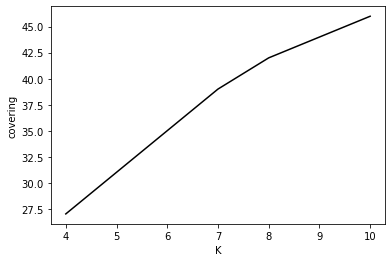

In [36]:
plt.plot(k_list, cover, c = 'black')
plt.xlabel('K')
plt.ylabel('covering')